<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/Python words.docx'

In [3]:
path = '/content/drive/MyDrive/Dataset/Python words.docx'

In [5]:
!pip install python-docx
from docx import Document

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.4 MB/s eta 0:00:00


In [6]:
doc = Document('/content/drive/MyDrive/Dataset/Python words.docx')
text = '\n'.join([paragraph.text for paragraph in doc.paragraphs])
print(text[:500])

Customer Demographics Analysis
Understanding the demographics of our customers is crucial for tailoring marketing strategies and optimizing our reach. Below are insights based on recent surveys and transaction data collected over the last quarter:
Age Distribution:
18-24 years: 25%
25-34 years: 40%
35-44 years: 20%
45-54 years: 10%
55+ years: 5%
Gender Breakdown:
Male: 45%
Female: 50%
Non-Binary/Other: 5%
Geographical Distribution:
North America: 45%
Europe: 30%
Asia-Pacific: 15%
Latin America: 


In [7]:
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[\w\s]', '', text)
    tokens = text.split()
    return tokens


tokens = preprocess(text)
print(tokens[:20])

['.::-:%-:%-:%-:%+:%::%:%-/:%::%:%-:%:%:%::%\':%\':%:%:-,,-.’,.,’:::,$,.:,,.:%.-::,$.:,,.:,%.::,$,.:,,.:%.::,$.:.:%,.:::$,:$,:$,:$,:$,:$,-::,,$,.:,,$,.:,,$,.::%:%:%-:%:,.,.,.(),\'-.’::$,::$:%():$:$,$,.%$.--.:::,.:$,:,,:,-():%:,():$:-.:$,:,:,:%:,:$.:.:$,:,:,:%:,:$.:,-,.,.-,.:::,,.:.::%:%:%:"!."".."",.":..,,,.,,,.']


In [8]:
from collections import Counter

word_freq = Counter(tokens)
print(word_freq.most_common(10))

[('.::-:%-:%-:%-:%+:%::%:%-/:%::%:%-:%:%:%::%\':%\':%:%:-,,-.’,.,’:::,$,.:,,.:%.-::,$.:,,.:,%.::,$,.:,,.:%.::,$.:.:%,.:::$,:$,:$,:$,:$,:$,-::,,$,.:,,$,.:,,$,.::%:%:%-:%:,.,.,.(),\'-.’::$,::$:%():$:$,$,.%$.--.:::,.:$,:,,:,-():%:,():$:-.:$,:,:,:%:,:$.:.:$,:,:,:%:,:$.:,-,.,.-,.:::,,.:.::%:%:%:"!."".."",.":..,,,.,,,.', 1)]


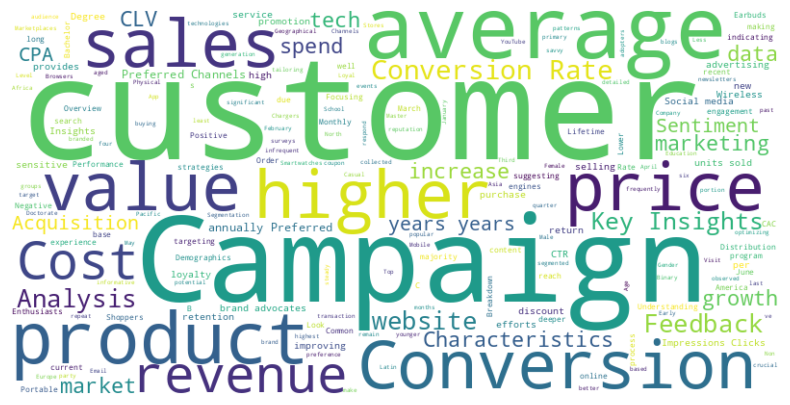

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform([text])
keywords = vectorizer.get_feature_names_out()
print(keywords)

['000' '25' 'and' 'average' 'campaign' 'conversion' 'cost' 'customer'
 'customers' 'for' 'higher' 'insights' 'of' 'our' 'rate' 'revenue' 'sales'
 'the' 'to' 'value']


In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text)
print(sentiment)

{'neg': 0.033, 'neu': 0.787, 'pos': 0.18, 'compound': 0.9992}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10)
ngrams = vectorizer.fit_transform([text])
print(vectorizer.get_feature_names_out())

['an average' 'annually preferred' 'average of' 'brand advocates'
 'conversion rate' 'key insights' 'of our' 'preferred channels' 'spend an'
 'the average']


In [16]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform([text])
lda = LatentDirichletAllocation(n_components=3)
lda.fit(dtm)
topics = lda.components_
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(topics):
    print(f"Topic {i} ", [words[j] for j in topic.argsort()[-10:]])

Topic 0  ['frequently', 'gender', 'generation', 'geographical', 'great', 'groups', '300', 'highest', 'early', 'youtube']
Topic 1  ['frequently', 'gender', 'generation', 'geographical', 'great', 'groups', '300', 'highest', 'early', 'youtube']
Topic 2  ['revenue', 'conversion', 'customers', '25', 'rate', 'insights', 'campaign', 'average', 'customer', '000']


In [17]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
entities = [(entity.text, entity.label_) for entity in doc.ents]
print(entities[:10])

[('Customer Demographics Analysis', 'ORG'), ('the last quarter', 'DATE'), ('18-24 years', 'DATE'), ('25%', 'PERCENT'), ('25-34 years', 'DATE'), ('40%', 'PERCENT'), ('35-44 years', 'DATE'), ('20%', 'PERCENT'), ('45-54 years', 'DATE'), ('10%', 'PERCENT')]


In [22]:
!pip install gensim==3.8.3

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (gensim)


In [23]:
from gensim.summarization import summarize

summary = summarize(text, ratio=0.1)
print(summary)

ModuleNotFoundError: No module named 'gensim.summarization'

In [24]:
from summa import summarizer

key_sentences = summarizer(text, ratio=0.1)
print(key_sentences)

ModuleNotFoundError: No module named 'summa'

In [28]:
import nltk


nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
avg_sentence_length = sum(len(sentence.split()) for sentence in sentences) / len(sentences)
print(f"Average sentence length: {avg_sentence_length} words")

Average sentence length: 19.88095238095238 words


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
sentences = sent_tokenize(text)
avg_sentence_length = sum(len(sentence.split()) for sentence in sentences) / len(sentences)
print(f"Average sentence length: {avg_sentence_length} words")

Average sentence length: 19.88095238095238 words


In [31]:
!pip install langdetect
from langdetect import detect

language = detect(text)
print(f"Language detected: {language}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=cf5ef2b5db13fd06639c68721ecaf7b1d0adff2ace30df6b1ee11011b7f9fb1d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Language detected: en


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_
print(clusters)

[1 1 2 1 2 1 1 2 1 1 2 1 1 2 1 2 2 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 2 1 0 2 2
 1 1 1 2 1]


In [35]:
adjectives = [token.text for token in doc if token.pos_ == 'ADJ']
print(adjectives[:20])

['crucial', 'recent', 'last', 'Binary', 'Other', 'Less', 'Higher', 'younger', 'savvy', 'significant', 'least', 'detailed', 'informative', 'primary', 'Early', 'new', 'Social', 'higher', 'average', 'Loyal']


In [36]:
sections = text.split('###')
for section in sections:
    word_count = len(section.split())
    print(f"Section: {section[:20]}... - Word Count: {word_count}")

Section: Customer Demographic... - Word Count: 835


In [37]:
from gensim.models import Word2Vec

model = Word2Vec([tokens], vector_size=100, window=5, min_count=2)
similar_words = model.wv.most_similar('customer', topn=10)
print(similar_words)

RuntimeError: you must first build vocabulary before training the model

In [38]:
model = Word2Vec([tokens], vector_size=100, window=5, min_count=2)
similar_words = model.wv.most_similar('customer', topn=10)
print(similar_words)

RuntimeError: you must first build vocabulary before training the model

In [40]:
positive_feedback = [sentence for sentence in sentences if sia.polarity_scores(sentence)['compound'] > 0.5]
negative_feedback = [sentence for sentence in sentences if sia.polarity_scores(sentence)['compound'] < -0.5]

print(f"Positive Feedback: {positive_feedback[:3]}")
print(f"Negative Feedback: {negative_feedback[:3]}")

Positive Feedback: ['Market Segmentation\nTo better target our marketing efforts, we’ve segmented our market into four primary groups:\nTech Enthusiasts:\nCharacteristics: Early adopters of new technologies, spend an average of $1,200 annually.', 'Conversion Rate: Lower, but respond well to promotions with a 20% increase in conversion during sales events.', 'Brand Advocates:\nCharacteristics: Loyal customers who value brand reputation, spend an average of $1,800 annually.']
Negative Feedback: ['Negative Feedback: Some complaints about the complexity of the return process and high prices compared to competitors.']


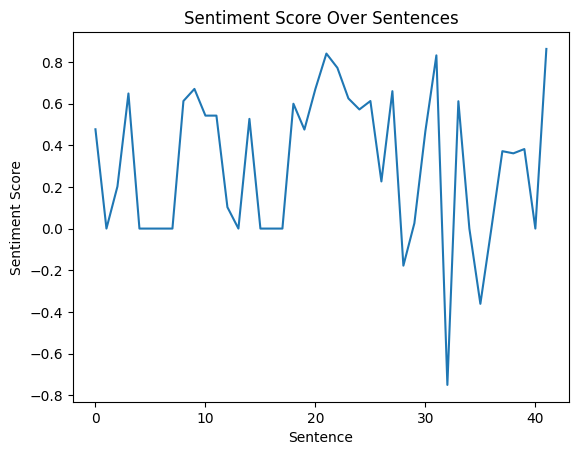

In [42]:
import matplotlib.pyplot as plt

sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]
plt.plot(sentiment_scores)
plt.title('Sentiment Score Over Sentences')
plt.xlabel('Sentence')
plt.ylabel('Sentiment Score')
plt.show()

In [45]:
from nltk import ngrams
bigrams = list(ngrams(tokens, 2))
bigram_freq = Counter(bigrams)
print(bigram_freq.most_common(20))

[]
